In [1]:
import numpy as np
import csv

In [4]:
with open('InTheBlind/allpredsaverage') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    full_x = []
    for row in csv_reader:
        x =', '.join(row)
        full_x.append(x)

In [5]:
full_x

['1, True, 0.6072248062015505',
 '2, True, 0.5614181818181815',
 '3, True, 0.726941568627451',
 '4, True, 0.5758999999999999',
 '5, True, 0.3987083333333332',
 '6, True, 0.6755415730337077',
 '7, True, 0.49627457627118665',
 '8, True, 0.5307533980582526',
 '9, True, 0.5065622047244092',
 '10, True, 0.5620212121212121',
 '11, True, 0.5076190476190474',
 '12, True, 0.7308732824427479',
 '13, True, 0.6919603703703703',
 '14, True, 0.6029080000000001',
 '15, True, 0.5106475177304964',
 '16, True, 0.5864595588235294',
 '17, True, 0.583078861788618',
 '18, True, 0.5318585937499999',
 '19, True, 0.4321259541984732',
 '20, True, 0.5963923076923081',
 '21, True, 0.6945029702970299',
 '22, True, 0.5834296296296296',
 '23, True, 0.6607811965811963',
 '24, True, 0.5919640624999999',
 '25, True, 0.5595961538461539',
 '26, True, 0.5271546099290785',
 '27, True, 0.7005938775510203',
 '28, True, 0.6912208955223877',
 '46, False, 0.5348556451612901',
 '47, False, 0.5629474452554744',
 '48, False, 0.517

In [7]:
first_pred = full_x[0]

In [8]:
first_pred

'1, True, 0.6072248062015505'

In [9]:
first_pred.split(', ')

['1', 'True', '0.6072248062015505']

In [12]:
subject = first_pred.split(', ')[0]
subj_class = first_pred.split(', ')[1]
prob_ADHD = float(first_pred.split(', ')[2])

In [16]:
subject

'1'

In [17]:
subj_class

'True'

In [18]:
prob_ADHD

0.6072248062015505

In [19]:
subj_class_list = []

In [23]:
subj_class_list = []
preds_list_for_subjects = []
subj_list = []

for prediction in full_x:
    first_pred = prediction
    subject = first_pred.split(', ')[0]
    subj_class = first_pred.split(', ')[1]
    prob_ADHD = float(first_pred.split(', ')[2])
    subj_list.append(subject)
    subj_class_list.append(subj_class)
    preds_list_for_subjects.append(prob_ADHD)

In [26]:
subj_list

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67']

In [27]:
y = subj_class_list

In [28]:
from sklearn import metrics

In [29]:
y = np.array(y)
pred = np.array(preds_list_for_subjects)

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label='True')

In [31]:
roc_auc = metrics.auc(fpr, tpr)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

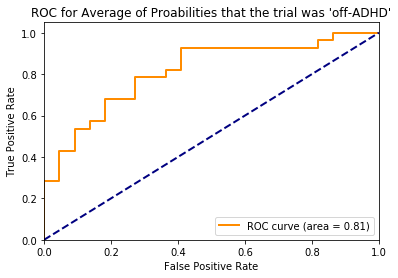

In [35]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC for Average of Proabilities that the trial was 'off-ADHD'")
plt.legend(loc="lower right")
plt.show()

In [98]:
subj_list = subj_list[1:]
subj_class_list = subj_class_list[1:]
preds_list_for_subjects = preds_list_for_subjects[1:]

In [99]:
subject_list_real = []
for subject in subj_list:
    if int(subject)>28:
        subject_list_real.append(int(subject)-17)
    else:
        subject_list_real.append(int(subject))
        

In [100]:
subject_list_real

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [101]:
from pandas import DataFrame
df = DataFrame({'Subjects': subject_list_real, 'Class': subj_class_list, 'Ratio: ADHD:All Predictions':preds_list_for_subjects})


In [102]:
df

,Subjects,Class,Ratio: ADHD:All Predictions
0,1,off-ADHD,0.713178
1,2,off-ADHD,0.645455
2,3,off-ADHD,0.803922
3,4,off-ADHD,0.620690
4,5,off-ADHD,0.298611
5,6,off-ADHD,0.764045
6,7,off-ADHD,0.491525
7,8,off-ADHD,0.533981
8,9,off-ADHD,0.496063
9,10,off-ADHD,0.515152


In [104]:
import openpyxl 

ModuleNotFoundError: No module named 'openpyxl'

In [105]:
df.to_excel('InTheBlind/subj_class_predsratio_clean.xlsx', sheet_name='sheet1', index=False)